In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [43]:
# iris data
iris = load_iris()
X = iris.data
y = iris.target

In [44]:
# use train/test splitter with different random_state value
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predict_test = knn_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(knn_predict_test, y_test)))

Accuracy: 0.9737


In [45]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

knn_model = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [46]:
print(scores.mean())

0.966666666667


In [47]:
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
print("Scores: \n {0}".format(k_scores))

Scores: 
 [0.96000000000000019, 0.95333333333333348, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96000000000000019, 0.96666666666666679, 0.96000000000000019, 0.96666666666666679, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


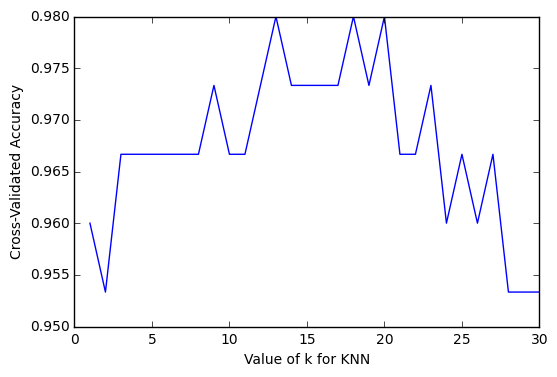

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Cross-Validated Accuracy")

# For KNN higher k gives less complexity (Important) b/c that, I select 20

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn_model, X, y, cv=10, scoring='accuracy').mean())

0.98


In [50]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
print(cross_val_score(lr_model, X, y, cv=10, scoring='accuracy').mean())

0.953333333333


### Cross validation example: Feature selection

Goal: Select wheter the newspaper feature should be included in linear regression on the advertising dataset

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [52]:
df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)

In [53]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [54]:
feature_col_names = ['TV','Radio','Newspaper']
X = df[feature_col_names]
y = df.Sales

In [61]:
lreg_model = LinearRegression()
scores = cross_val_score(lreg_model, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [65]:
mse_scores = -scores
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [67]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [68]:
# calculate the average RMSE
print(rmse_scores.mean())

1.69135317081


In [73]:
# 10 fold cross-validation with two features (exluding newspaper)
feature_cols = ['TV', 'Radio']
X = df[feature_cols]
print(np.sqrt(-cross_val_score(lreg_model, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.67967484191
